In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(5)

# Предположим, что есть 2 класса с баллами ЕГЭ по математике.
class1 = np.random.randint(30, 100, 30)  #выборка с целыми числами от 30 до 100
class2 = np.random.randint(30, 100, 30)  #выборка с целыми числами от 30 до 100

pd.DataFrame({'class1': class1, 'class2': class2}).describe().loc[['min', 'max', 'mean', '50%']]

,class1,class2
min,30.0,33.0
max,98.0,97.0
mean,60.7,59.5
50%,58.5,59.5


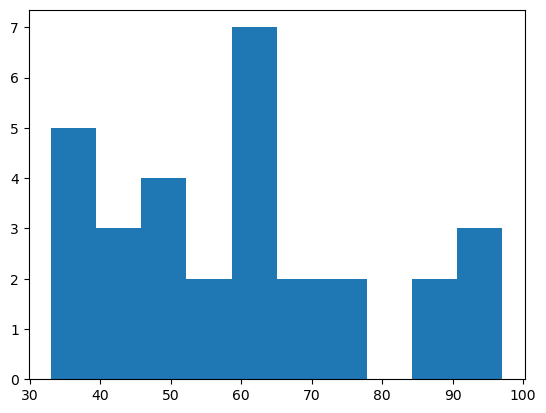

In [3]:
# Постройте гистограмму с 5-ю бинами для class1.
plt.hist(class2, bins=10)
plt.show();

In [4]:
# Любым способом посчитайте для каждой уникальной оценки (для каждого балла) 
# из списка class1 кол-во повторений. 
# Какой балл повторяется чаще всего.

pd.DataFrame(class1).value_counts().idxmax()[0]

np.int32(57)

In [5]:
values, counts = np.unique(class1, return_counts=True)

values[counts.argmax()]

np.int32(57)

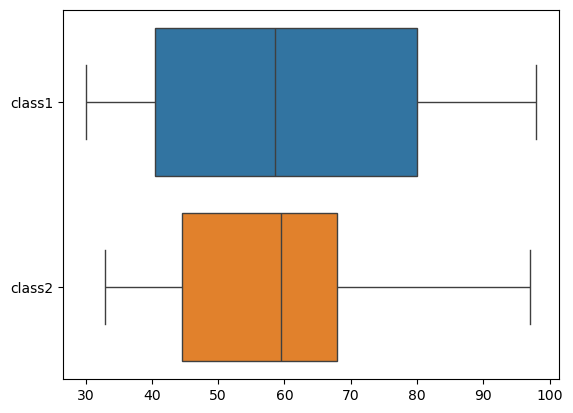

In [6]:
# Постройте 2 boxplot, выберите верные утверждения.

visual_df = pd.DataFrame({'class1': class1, 'class2': class2})

sns.boxplot(visual_df, orient='h')
plt.show()

In [7]:
# Объедините 2 класса (два одномерных массива) в один с помощью метода np.concatenate(). 
# Найдите балл, ниже которого попадают баллы 90% учеников.
# Иначе говоря, найдите значение, которое соответствует 90-му перцентилю (0.9 квантилю).

final_class = np.concatenate([class1, class2], axis=0)
np.quantile(final_class, .9)

np.float64(92.0)

In [8]:
np.quantile([class1, class2], .9)

np.float64(92.0)

In [9]:
# Посчитайте дисперсию для class1. Округлите ответ до двух знаков после запятой.
np.var(class1).round(2)
np.mean(np.square(class1 - np.mean(class1))).round(2)

np.float64(470.94)

In [10]:
# Посчитайте стандартное отклонение для class1. Округлите ответ до одного знака после запятой.
np.std(class1).round(1)

np.float64(21.7)

In [11]:
# Компания по продаже косметики разыгрывает сертификаты номиналом 2 000 рублей, 3 000 рублей и 5 000 рублей. 
# Сертификаты будут разыграны случайно среди топ 20 клиентов, которые принесли компании наибольшую выручку в прошлом месяце.

sertificates = [3000, 3000, 5000, 5000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 3000, 3000]

# Посчитайте среднее.

s_mean = np.mean(sertificates)
s_mean

np.float64(2500.0)

In [12]:
# Какова вероятность, что рандомный клиент получит сертификат номиналом 2 000 рублей?
# Ответ запишите в виде доли. Например 0.4

sertificates.count(2000) / len(sertificates)

0.7

In [13]:
# Какова вероятность, что рандомный клиент получит сертификат номиналом 3 000 или 5 000 рублей?
# Ответ запишите в виде доли. Например 0.4

(sertificates.count(3000) + sertificates.count(5000)) / len(sertificates)

0.3

In [14]:
# Посчитайте матожидание.

np.sum([sertificates.count(i) * i / len(sertificates) for i in np.unique(sertificates)])

np.float64(2500.0)